In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('/content/House_Pricing.xlsx', index_col=False)
df.head(5)

,Sales_ID,Sale Price,Property_ID,Street Number,Street Name,Unit,Area,First Price,Last Price,First Date,Close Date,Interior(Sq Ft,# of Bed,# of Bath,# of Rooms,Condo Fee,Tax,RC
0,2,125000,"2/239 Allston St,CP",239,Allston St,2,CP,127000,127000,1993-08-21,1993-10-22,850,2,1,5,100,923,1
1,3,95000,"3/83 Amory St,M",83,Amory St,3,M,123000,100000,1993-03-06,1993-09-30,730,2,1,4,185,575,0
2,4,189000,"3/43 Antrim St,M",43,Antrim St,3,M,194000,194000,1993-05-18,1993-08-06,1058,3,1,5,163,1682,0
3,5,202000,"3/95 Antrim St,M",95,Antrim St,3,M,245000,214900,1992-08-08,1993-01-15,1585,2,1,6,100,1402,1
4,6,206000,"1/107 Antrim St,M",107,Antrim St,1,M,219000,210000,1991-03-17,1991-08-23,1460,3,2,6,100,1582,1


In [3]:
X = df['Interior(Sq Ft']
y = df['Sale Price']

In [4]:
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"No. of records in train_set: {len(X_train)}")
print(f"No. of records in test_set: {len(X_test)}")

No. of records in train_set: 333
No. of records in test_set: 84


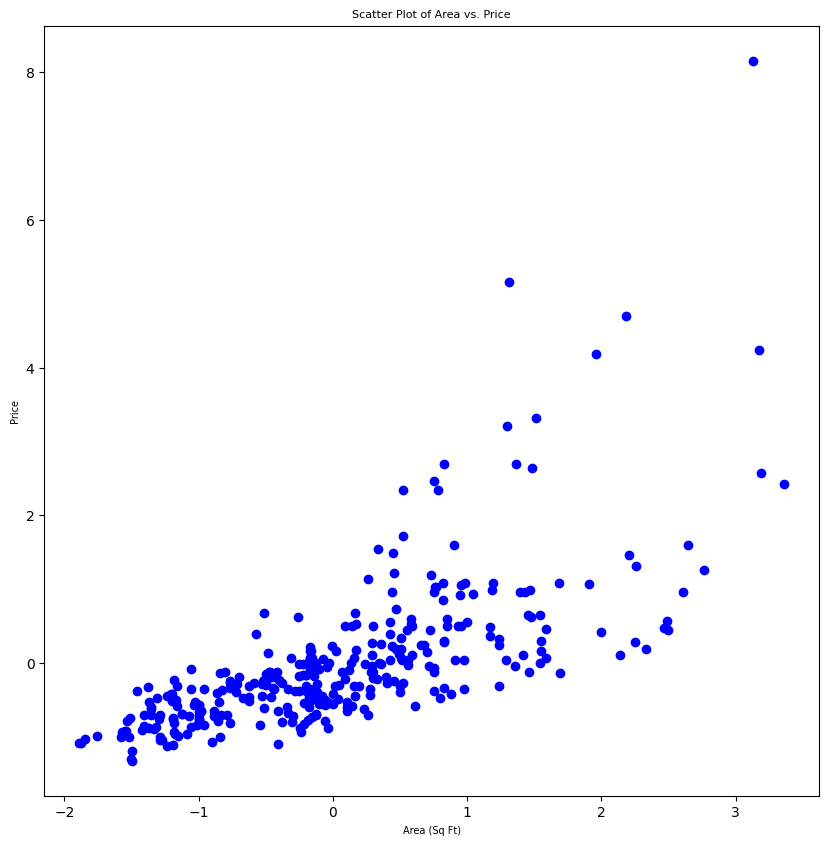

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, color='blue')

# Adding title and labels
plt.title('Scatter Plot of Area vs. Price', fontsize=8)
plt.xlabel('Area (Sq Ft)', fontsize=7)
plt.ylabel('Price', fontsize=7)

# Display the plot
plt.show()

In [7]:
# Hyperparameters
learning_rate = 0.01  # Step size for gradient descent
n_iterations = 1000  # Number of iterations
regularization_param = 0.1  # Ridge regression penalty (lambda)

# Initialize weights (slope 'm') and bias (intercept 'c')
m = 0  # Start with a slope of 0
c = 0  # Start with an intercept of 0

In [8]:
n_samples = len(X_train)  # Number of data points

# Store cost values for plotting
cost_history = []

# Gradient Descent loop
for i in range(n_iterations):
    # Prediction: y_pred = m*X + c
    y_pred = m * X_train + c

    # Calculate cost (with Ridge penalty)
    mse = (1/n_samples) * np.sum((y_train - y_pred) ** 2)
    lasso_penalty = regularization_param * (np.abs(m))
    cost = mse + lasso_penalty

    # Print cost every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}, Cost: {cost}, m: {m}, c: {c}")

    # Calculate gradients
    dm = (-2/n_samples) * np.sum(X_train * (y_train - y_pred)) + regularization_param * np.sign(m)  # Derivative w.r.t m (with regularization)
    dc = (-2/n_samples) * np.sum(y_train - y_pred)  # Derivative w.r.t c (bias term)

    # Update weights and bias
    m -= learning_rate * dm
    c -= learning_rate * dc

    # print(f"Epoch {_}, Loss: {cost:.4f}, m: {m:.4f}, c: {c:.4f}")
    # if _ > 0 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
    #     print(f"Converged after {_12} iterations.")
    #     break

# Final slope (m) and intercept (c)
print(f"Final slope (m): {m}")
print(f"Final intercept (c): {c}")

Iteration 0, Cost: 1.043287995548213, m: 0, c: 0
Final slope (m): 0.6421783070268482
Final intercept (c): -0.01205952236496159


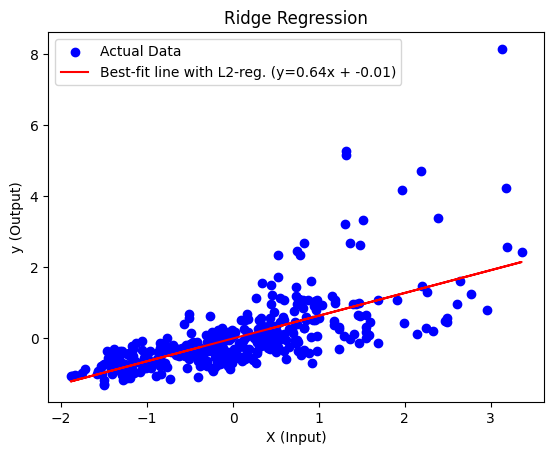

In [9]:
# Predictions after training
y_pred = m * X + c

# Plotting the results
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label=f'Best-fit line with L2-reg. (y={m:.2f}x + {c:.2f})')
plt.title("Ridge Regression")
plt.xlabel("X (Input)")
plt.ylabel("y (Output)")
plt.legend()

Final slope (m): 0.5947398186227328
Final intercept (c): -0.010373544792913244


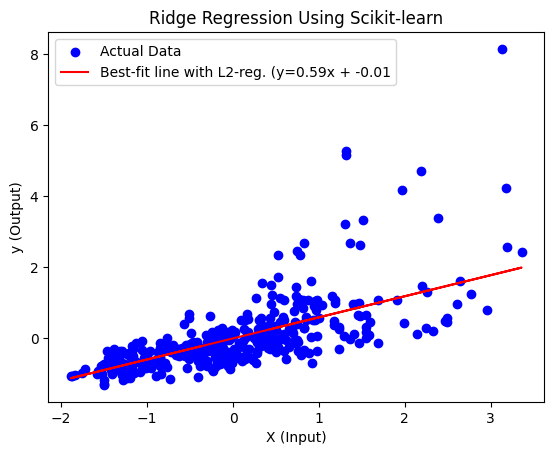

In [10]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression model with a specified regularization strength
lasso_reg = Lasso(alpha=0.1)  # alpha is the regularization parameter (lambda)

X_train_value = X_train.values.reshape(-1, 1)  # Feature (input variable)
y_train_value = y_train.values  # Target (output variable)

# Fit the model to the data
lasso_reg.fit(X_train_value, y_train_value)

X_value = X.values.reshape(-1, 1)
# Predictions after training
y_pred = lasso_reg.predict(X_value)

# Print the slope (coef_) and intercept (intercept_)
print(f"Final slope (m): {lasso_reg.coef_[0]}")
print(f"Final intercept (c): {lasso_reg.intercept_}")

# Plotting the results
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label=f"Best-fit line with L2-reg. (y={lasso_reg.coef_[0]:.2f}x + {lasso_reg.intercept_:.2f}")
plt.title("Ridge Regression Using Scikit-learn")
plt.xlabel("X (Input)")
plt.ylabel("y (Output)")
plt.legend()
plt.show()